In [267]:
import numpy as np 
import os
import pandas as pd
os.chdir('D:\\Insofe\\Python Lab\\Data_Forall')

In [268]:
# Read the data
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [269]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [270]:
# Read the Train Input files
# Read the Input files
train = pd.read_csv("TrainData.csv")
test = pd.read_csv("TestData.csv")
test1 = test.copy()

In [271]:
print(train.shape,test.shape)

(58857, 20) (19594, 19)


In [272]:
# Removing duplicate rows
train = train.drop_duplicates()

In [273]:
test = test.drop_duplicates()

In [274]:
train.head()

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,03-04-2016 00:00,0,34474,07-04-2016 13:15
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,08-03-2016 00:00,0,50765,11-03-2016 17:15
2,3,26-03-2016 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000,2,diesel,mercedes_benz,No,26-03-2016 00:00,0,90475,26-03-2016 17:38
3,4,11-03-2016 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000,9,diesel,alfa_romeo,No,11-03-2016 00:00,0,40699,12-03-2016 02:45
4,5,17-03-2016 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000,3,petrol,audi,No,17-03-2016 00:00,0,84347,07-04-2016 04:17


In [275]:
train.dtypes


VehicleID                      int64
DataCollectedDate             object
NameOfTheVehicle              object
SellerType                    object
OfferType                     object
Price                          int64
VehicleType                   object
YearOfVehicleRegistration      int64
GearBoxType                   object
PowerOfTheEngine               int64
ModelOfTheVehicle             object
DistranceTravelled             int64
MonthOfVehicleRegistration     int64
TypeOfTheFuelUsed             object
BrandOfTheVehicle             object
IsDamageRepaired              object
DateOfAdCreation              object
NumberOfPictures               int64
ZipCode                        int64
DateOfAdLastSeen              object
dtype: object

In [276]:
#dates are not parsed... lets make sure they are treated as dates.
date_columns = ["DateOfAdCreation", "DateOfAdLastSeen"]
# A date looks like => "2016-04-07 03:16:57"
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y %H:%M')
train = pd.read_csv("TrainData.csv", parse_dates=date_columns, date_parser=dateparse, encoding='cp1252')

In [277]:
#dates are not parsed... lets make sure they are treated as dates.
date_columns = ["DateOfAdCreation", "DateOfAdLastSeen"]
# A date looks like => "2016-04-07 03:16:57"
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y %H:%M')
test = pd.read_csv("TestData.csv", parse_dates=date_columns, date_parser=dateparse, encoding='cp1252')

In [278]:
train.dtypes

VehicleID                              int64
DataCollectedDate                     object
NameOfTheVehicle                      object
SellerType                            object
OfferType                             object
Price                                  int64
VehicleType                           object
YearOfVehicleRegistration              int64
GearBoxType                           object
PowerOfTheEngine                       int64
ModelOfTheVehicle                     object
DistranceTravelled                     int64
MonthOfVehicleRegistration             int64
TypeOfTheFuelUsed                     object
BrandOfTheVehicle                     object
IsDamageRepaired                      object
DateOfAdCreation              datetime64[ns]
NumberOfPictures                       int64
ZipCode                                int64
DateOfAdLastSeen              datetime64[ns]
dtype: object

In [279]:
train.head()

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,2016-04-03,0,34474,2016-04-07 13:15:00
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,2016-03-08,0,50765,2016-03-11 17:15:00
2,3,26-03-2016 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000,2,diesel,mercedes_benz,No,2016-03-26,0,90475,2016-03-26 17:38:00
3,4,11-03-2016 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000,9,diesel,alfa_romeo,No,2016-03-11,0,40699,2016-03-12 02:45:00
4,5,17-03-2016 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000,3,petrol,audi,No,2016-03-17,0,84347,2016-04-07 04:17:00


In [280]:
train.describe()

,VehicleID,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,NumberOfPictures,ZipCode
count,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.0,58857.000000
mean,29429.000000,7638.980971,2006.286457,130.013473,120146.626569,6.217442,0.0,51941.873881
std,16990.696734,6710.787043,4.016998,178.318088,41188.999160,3.458960,0.0,25639.658736
min,1.000000,1001.000000,2000.000000,1.000000,5000.000000,1.000000,0.0,1067.000000
25%,14715.000000,2850.000000,2003.000000,86.000000,90000.000000,3.000000,0.0,31675.000000
50%,29429.000000,5400.000000,2006.000000,121.000000,150000.000000,6.000000,0.0,51067.000000
75%,44143.000000,9999.000000,2009.000000,163.000000,150000.000000,9.000000,0.0,72760.000000
max,58857.000000,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0,99998.000000


In [281]:
# The NumberOfPictures column is useless, as it is always 0.
# The Zipcode might not be of much value.
# monthOfRegistration: Values seem correc


In [282]:
# Cleaning the data
train = train.drop(['NumberOfPictures','ZipCode','MonthOfVehicleRegistration'],axis=1)

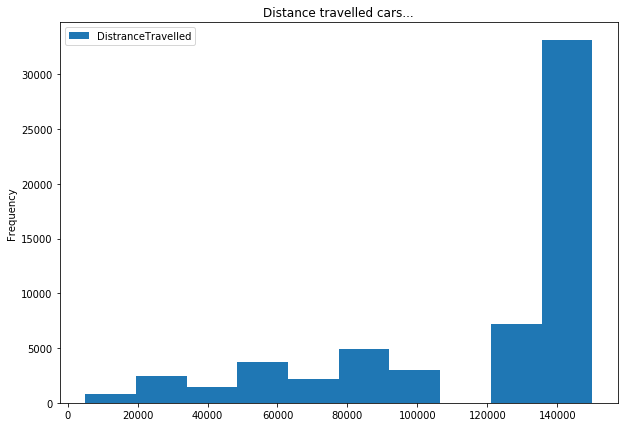

In [283]:
train.plot(y="DistranceTravelled", kind="hist", figsize=(10, 7), bins=10, title="Distance travelled cars...")

In [284]:
# Lets also check how many DIFFERENT values we have there...
set(train["DistranceTravelled"])

{5000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 125000,
 150000}

In [285]:
#Cleaning the PowerOfTheEngine column
train["PowerOfTheEngine"].describe()

count    58857.000000
mean       130.013473
std        178.318088
min          1.000000
25%         86.000000
50%        121.000000
75%        163.000000
max      19211.000000
Name: PowerOfTheEngine, dtype: float64

In [286]:
#  It is obvious, we cannot have cars with one power, so lets get rid of them
print("Size before removing cars with 1 power", len(train))

Size before removing cars with 1 power 58857


In [287]:
train = train[train["PowerOfTheEngine"] > 1]

In [288]:
print("Size after removing cars with 1 power", len(train))

Size after removing cars with 1 power 55500


In [289]:
#  It is obvious, we cannot have cars with one power, so lets get rid of them
print("Size before removing cars with 1 power", len(test))

Size before removing cars with 1 power 19594


In [290]:
train = train[train["PowerOfTheEngine"] >= 60]
print("Size after removing cars with less than 60hp", len(train))

Size after removing cars with less than 60hp 53621


In [291]:
train = train[train["PowerOfTheEngine"] <= 1000]
print("Size after removing cars with more than 1000hp", len(train))

Size after removing cars with more than 1000hp 53588


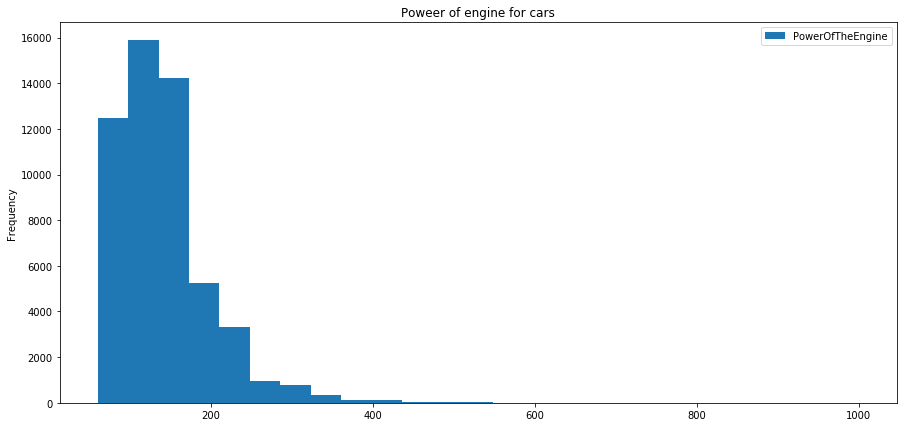

In [292]:
train.plot(y="PowerOfTheEngine", kind='hist', bins=25, figsize=(15, 7), title='Poweer of engine for cars')

In [293]:
meanT_POWER = train["PowerOfTheEngine"].mean()

In [294]:
train["YearOfVehicleRegistration"].describe()

count    53588.000000
mean      2006.429667
std          3.988352
min       2000.000000
25%       2003.000000
50%       2006.000000
75%       2009.000000
max       2016.000000
Name: YearOfVehicleRegistration, dtype: float64

In [295]:
max(train["DateOfAdCreation"])

Timestamp('2016-04-07 00:00:00')

In [296]:
train = train[train["YearOfVehicleRegistration"] <= 2016]
print("Rows after removing cars whose registration was AFTER 2016 => ", len(train))

Rows after removing cars whose registration was AFTER 2016 =>  53588


In [297]:
train["Price"].describe()


count    53588.000000
mean      8015.459692
std       6806.297491
min       1001.000000
25%       3046.750000
50%       5847.000000
75%      10600.000000
max      39800.000000
Name: Price, dtype: float64

In [298]:
del train["NameOfTheVehicle"]

In [299]:
del train["SellerType"]

In [300]:
del test["SellerType"]

In [301]:
set(train["OfferType"])

{'offer'}

In [302]:
del train["OfferType"]


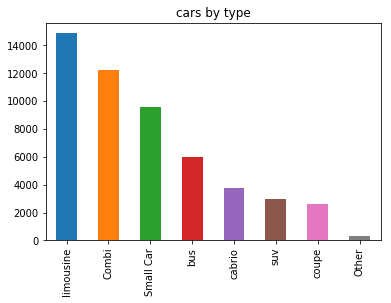

In [303]:
train["VehicleType"].value_counts().plot(kind='bar', title="cars by type")

In [304]:
print("Rows without a vehicle type", train["VehicleType"].isna().sum())
print("Total number of rows", len(train))

Rows without a vehicle type 1193
Total number of rows 53588


In [305]:
print("Rows before droping cars without type", len(train))
train =train.dropna(subset=["VehicleType"])
print("Rows after droping cars without type", len(train))

Rows before droping cars without type 53588
Rows after droping cars without type 52395


In [306]:
train.dtypes


VehicleID                             int64
DataCollectedDate                    object
Price                                 int64
VehicleType                          object
YearOfVehicleRegistration             int64
GearBoxType                          object
PowerOfTheEngine                      int64
ModelOfTheVehicle                    object
DistranceTravelled                    int64
TypeOfTheFuelUsed                    object
BrandOfTheVehicle                    object
IsDamageRepaired                     object
DateOfAdCreation             datetime64[ns]
DateOfAdLastSeen             datetime64[ns]
dtype: object

In [307]:
for col in train.columns:
   if (train[col].dtype == "object"):
       train[col] = train[col].astype('category')

for col in train.columns:
   if (train[col].dtype == np.float64):
       train[col] = train[col].fillna(0).astype(np.int64)
    
for col in test.columns:
   if (test[col].dtype == "object"):
       test[col] = test[col].astype('category')
        
for col in test.columns:
   if (test[col].dtype == np.float64):
       test[col] = test[col].fillna(0).astype(np.int64)

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52395 entries, 0 to 58856
Data columns (total 14 columns):
VehicleID                    52395 non-null int64
DataCollectedDate            52395 non-null category
Price                        52395 non-null int64
VehicleType                  52395 non-null category
YearOfVehicleRegistration    52395 non-null int64
GearBoxType                  51887 non-null category
PowerOfTheEngine             52395 non-null int64
ModelOfTheVehicle            52395 non-null category
DistranceTravelled           52395 non-null int64
TypeOfTheFuelUsed            51348 non-null category
BrandOfTheVehicle            52395 non-null category
IsDamageRepaired             47808 non-null category
DateOfAdCreation             52395 non-null datetime64[ns]
DateOfAdLastSeen             52395 non-null datetime64[ns]
dtypes: category(7), datetime64[ns](2), int64(5)
memory usage: 4.1 MB


In [309]:
train =train.dropna(subset=["VehicleType","GearBoxType","ModelOfTheVehicle","TypeOfTheFuelUsed","BrandOfTheVehicle","IsDamageRepaired"])



In [310]:
del train["DataCollectedDate"]
del train['VehicleID']

In [311]:
del train["DateOfAdCreation"]
del train['DateOfAdLastSeen']
del train["ModelOfTheVehicle"]

In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 58856
Data columns (total 9 columns):
Price                        46714 non-null int64
VehicleType                  46714 non-null category
YearOfVehicleRegistration    46714 non-null int64
GearBoxType                  46714 non-null category
PowerOfTheEngine             46714 non-null int64
DistranceTravelled           46714 non-null int64
TypeOfTheFuelUsed            46714 non-null category
BrandOfTheVehicle            46714 non-null category
IsDamageRepaired             46714 non-null category
dtypes: category(5), int64(4)
memory usage: 2.0 MB


In [313]:
print(train.shape, test.shape)

(46714, 9) (19594, 18)


In [314]:
train_labels = train.pop('Price')

In [315]:
numerical_Attributes_train = train.select_dtypes(exclude=['category']).columns

In [316]:
numerical_Attributes_test = test.select_dtypes(exclude=['category']).columns

In [317]:
categorical_Attributes_train = train.select_dtypes(include=['category']).columns

In [318]:
categorical_Attributes_test = test.select_dtypes(include=['category']).columns

In [319]:
print(train.shape, test.shape)

(46714, 8) (19594, 18)


In [320]:
# Data Imputation
# Impute missing values with mean Imputation in Train
from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_train :
    train[cols] = num_mean_imputer.fit_transform(train[[cols]])
 

In [190]:
# Data Imputation
# Impute missing values with mean Imputation in Test

from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_test :
    test[cols] = num_mean_imputer.fit_transform(test[[cols]])

In [191]:
train.isnull().sum()

VehicleType                  0
YearOfVehicleRegistration    0
GearBoxType                  0
PowerOfTheEngine             0
DistranceTravelled           0
TypeOfTheFuelUsed            0
BrandOfTheVehicle            0
IsDamageRepaired             0
dtype: int64

In [192]:
test.isnull().sum()

VehicleID                        0
DataCollectedDate                0
NameOfTheVehicle                 0
OfferType                        0
VehicleType                    636
YearOfVehicleRegistration        0
GearBoxType                    504
PowerOfTheEngine                 0
ModelOfTheVehicle                0
DistranceTravelled               0
MonthOfVehicleRegistration       0
TypeOfTheFuelUsed              754
BrandOfTheVehicle                0
IsDamageRepaired              2245
DateOfAdCreation                 0
NumberOfPictures                 0
ZipCode                          0
DateOfAdLastSeen                 0
dtype: int64

In [193]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19594 entries, 0 to 19593
Data columns (total 18 columns):
VehicleID                     19594 non-null float64
DataCollectedDate             19594 non-null category
NameOfTheVehicle              19594 non-null category
OfferType                     19594 non-null category
VehicleType                   18958 non-null category
YearOfVehicleRegistration     19594 non-null float64
GearBoxType                   19090 non-null category
PowerOfTheEngine              19594 non-null float64
ModelOfTheVehicle             19594 non-null category
DistranceTravelled            19594 non-null float64
MonthOfVehicleRegistration    19594 non-null float64
TypeOfTheFuelUsed             18840 non-null category
BrandOfTheVehicle             19594 non-null category
IsDamageRepaired              17349 non-null category
DateOfAdCreation              19594 non-null float64
NumberOfPictures              19594 non-null float64
ZipCode                       1959

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 58856
Data columns (total 8 columns):
VehicleType                  46714 non-null category
YearOfVehicleRegistration    46714 non-null float64
GearBoxType                  46714 non-null category
PowerOfTheEngine             46714 non-null float64
DistranceTravelled           46714 non-null float64
TypeOfTheFuelUsed            46714 non-null category
BrandOfTheVehicle            46714 non-null category
IsDamageRepaired             46714 non-null category
dtypes: category(5), float64(3)
memory usage: 1.7 MB


In [195]:
train = pd.get_dummies(columns=categorical_Attributes_train,data=train,prefix=categorical_Attributes_train,prefix_sep="_",drop_first=True)

In [196]:
test = pd.get_dummies(columns=categorical_Attributes_test,data=test,prefix=categorical_Attributes_test,prefix_sep="_",drop_first=True)

In [227]:
del train['BrandOfTheVehicle_rover']

In [197]:
print(train.shape, test.shape)

(46714, 55) (19594, 25180)


In [ ]:
col_test_not_train =   set(test.columns).difference(set(train.columns))
cols_train_not_test =  set(train.columns).difference(set(test.columns))
for cols in col_test_not_train:
    test.drop([cols],axis=1, inplace=True)
for cols in col_train_not_test:
    test[cols] =  0

In [198]:
train.head(6)

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,...,BrandOfTheVehicle_saab,BrandOfTheVehicle_seat,BrandOfTheVehicle_skoda,BrandOfTheVehicle_smart,BrandOfTheVehicle_subaru,BrandOfTheVehicle_suzuki,BrandOfTheVehicle_toyota,BrandOfTheVehicle_volkswagen,BrandOfTheVehicle_volvo,IsDamageRepaired_Yes
0,2004.0,94.0,50000.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2007.0,140.0,150000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2007.0,150.0,150000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2005.0,150.0,150000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2005.0,200.0,125000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2000.0,129.0,150000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
test.head(6)

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,60001,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
1,60002,21-03-2016 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000,2,NaN,volkswagen,No,2016-03-21,0,90762,2016-03-23 02:50:00
2,60003,21-03-2016 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000,3,diesel,nissan,No,2016-03-21,0,4177,2016-04-06 07:45:00
3,60004,23-03-2016 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000,6,diesel,ford,No,2016-03-23,0,88361,2016-04-05 18:45:00
4,60005,18-03-2016 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000,9,diesel,bmw,Yes,2016-03-18,0,73765,2016-03-18 21:44:00
5,60006,24-03-2016 00:52,BMW_E60_530XD,private,offer,limousine,2006,automatic,231,5er,150000,11,diesel,bmw,NaN,2016-03-23,0,46119,2016-04-04 16:18:00


In [236]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = train
y = np.log(train_labels)

In [237]:
# Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [238]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37371, 54)
(9343, 54)
(37371,)
(9343,)


In [239]:
numerical_Attributes_train = train.select_dtypes(exclude=['category']).columns

In [240]:
numerical_Attributes_test = test.select_dtypes(exclude=['category']).columns

In [241]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for cols in numerical_Attributes_train :
    X_train[cols] = scaler.fit_transform(X_train[[cols]])
    
for cols in numerical_Attributes_train :
    X_test[cols] = scaler.fit_transform(X_test[[cols]])

In [323]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [324]:
# Making predictions
y_pred = rfr.predict(X_test)

In [325]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean absolute Error: 1444.6988687100095
Mean Squared Error: 5351192.845069135
Root Mean Square error: 2313.2645428201968


In [242]:
from sklearn.ensemble import GradientBoostingRegressor

In [243]:
GBM_model = GradientBoostingRegressor(n_estimators=150,
                                       learning_rate=0.9,
                                       subsample=0.8)

In [244]:
%time GBM_model.fit(X=X_train, y=y_train)

Wall time: 30.5 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.9, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [245]:
y_pred = GBM_model.predict(X_test)

In [246]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean absolute Error: 0.21296470298707176
Mean Squared Error: 0.0832262730011409
Root Mean Square error: 0.28848964106383596


In [264]:
# Build a Linear Model uisng Log Transformation
X = train
y = np.log(train_labels)

In [265]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=1, test_size=0.2)

In [263]:
# Random Forest algorithm
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=250,random_state=0,max_depth=5)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
# Making predictions
y_pred_rfr = rfr.predict(X_test)

In [83]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_rfr,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", rfr.score(X_test, y_test))

Root Mean Square error: 0.3762080944905238
R^2 is: 
 0.7873796093999438


In [ ]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_rfc,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_rfc,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_rfc,y_test)))

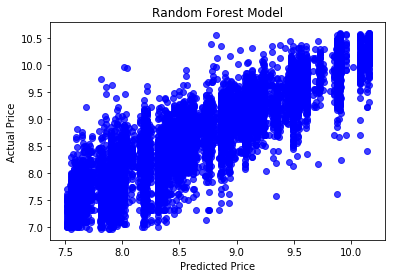

In [84]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_rfr, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')
plt.show()

In [161]:
# XGBoost model
from xgboost import XGBRegressor
xgb = XGBRegressor(nthread=5,max_depth=5,learning_rate=0.07,n_estimators=250)
model_xgb= xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [162]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_xgb,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_xgb.score(X_test, y_test))

Root Mean Square error: 0.273559657646099
R^2 is: 
 0.8878838249823212


In [163]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_xgb,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_xgb,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_xgb,y_test)))

Mean absolute Error: 0.2008044402440755
Mean Squared Error: 0.0748348862914509
Root Mean Square error: 0.273559657646099


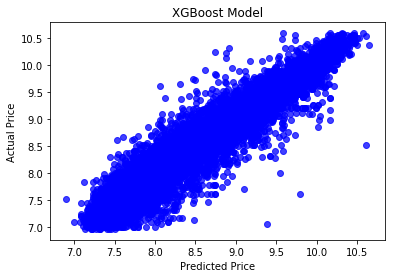

In [164]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_xgb, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb = xgb.XGBRegressor(nthread=4,max_depth=5,learning_rate=0.05,n_estimators=250)

 
# Use a grid over parameters of interest
#param_grid = { 
#          "nthread":[4,5], 
 #          "max_depth" : [5, 10],
#           "learning_rate" : [0.05,0.1, 0.2],
#           "n_estimators": [250,300,350]
 #          }
 
#xgb_f = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [92]:
%time xgb.fit(X_train, y_train)

Wall time: 43.6 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [93]:
y_pred_test_xgb = xgb.predict(X_test)

In [94]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_test_xgb,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", xgb.score(X_test, y_test))

Root Mean Square error: 0.2744156962256071
R^2 is: 
 0.8868729302295825


In [95]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_test_xgb,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_test_xgb,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_test_xgb,y_test)))

Mean absolute Error: 0.20447585060283385
Mean Squared Error: 0.07530397433498465
Root Mean Square error: 0.2744156962256071


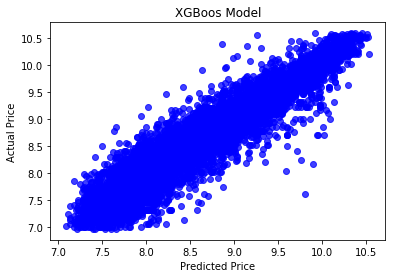

In [96]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_test_xgb, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoos Model')
plt.show()

In [248]:
col_names = list(train.columns.values)

In [249]:
test = pd.DataFrame(test,columns = col_names )

In [250]:
test.dtypes

YearOfVehicleRegistration          float64
PowerOfTheEngine                   float64
DistranceTravelled                 float64
VehicleType_Other                    uint8
VehicleType_Small Car                uint8
VehicleType_bus                      uint8
VehicleType_cabrio                   uint8
VehicleType_coupe                    uint8
VehicleType_limousine                uint8
VehicleType_suv                      uint8
GearBoxType_manual                   uint8
TypeOfTheFuelUsed_diesel             uint8
TypeOfTheFuelUsed_electro            uint8
TypeOfTheFuelUsed_hybrid             uint8
TypeOfTheFuelUsed_lpg                uint8
TypeOfTheFuelUsed_other              uint8
TypeOfTheFuelUsed_petrol             uint8
BrandOfTheVehicle_audi               uint8
BrandOfTheVehicle_bmw                uint8
BrandOfTheVehicle_chevrolet          uint8
BrandOfTheVehicle_chrysler           uint8
BrandOfTheVehicle_citroen            uint8
BrandOfTheVehicle_dacia              uint8
BrandOfTheV

In [251]:
test1 = pd.read_csv("TestData.csv")

In [252]:
submission = pd.DataFrame()
submission['VehicleID'] = test1.VehicleID

In [253]:
feats = test.select_dtypes(
        include=[np.number]).interpolate()

In [254]:
 test.head(5)
test.isnull().sum()

YearOfVehicleRegistration          0
PowerOfTheEngine                   0
DistranceTravelled                 0
VehicleType_Other                  0
VehicleType_Small Car              0
VehicleType_bus                    0
VehicleType_cabrio                 0
VehicleType_coupe                  0
VehicleType_limousine              0
VehicleType_suv                    0
GearBoxType_manual                 0
TypeOfTheFuelUsed_diesel           0
TypeOfTheFuelUsed_electro          0
TypeOfTheFuelUsed_hybrid           0
TypeOfTheFuelUsed_lpg              0
TypeOfTheFuelUsed_other            0
TypeOfTheFuelUsed_petrol           0
BrandOfTheVehicle_audi             0
BrandOfTheVehicle_bmw              0
BrandOfTheVehicle_chevrolet        0
BrandOfTheVehicle_chrysler         0
BrandOfTheVehicle_citroen          0
BrandOfTheVehicle_dacia            0
BrandOfTheVehicle_daewoo           0
BrandOfTheVehicle_daihatsu         0
BrandOfTheVehicle_fiat             0
BrandOfTheVehicle_ford             0
B

In [255]:
# Select the features from Test data
predictions = GBM_model.predict(feats)

In [256]:
# Transform the Predicitons to correct form
final_predictions = np.exp(predictions)

In [257]:
# Compare Original and Final Predicitons
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [5.44022242 5.9648662  5.44022242 5.44022242 5.44022242] 

Final predictions are: 
 [230.49344393 389.50090868 230.49344393 230.49344393 230.49344393]


In [258]:
final_predictions.shape

(19594,)

In [259]:
submission['Price'] = final_predictions
submission.head()

,VehicleID,Price
0,60001,230.493444
1,60002,389.500909
2,60003,230.493444
3,60004,230.493444
4,60005,230.493444


In [260]:
submission.to_csv('submissionX.csv', index=False)